# Pymaceuticals Inc.
---

### Analysis


Pymaceuticals Analysis:

    Capomulin is the most popular drug regimen among the mice tested.

    Ramicane was the most succesful drug treatment in reducing tumor size.

    While using Capomulin, tumor volume increased with average weight of mice.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df))
# Print number of unique mice id's
print(len(clean_df["Mouse ID"].unique()))

1888
249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_df.groupby(["Drug Regimen"])

meantumorvol = drug_regimen["Tumor Volume (mm3)"].mean()
medtumorvol = drug_regimen["Tumor Volume (mm3)"].median()
tumorvariance = drug_regimen["Tumor Volume (mm3)"].var()
tumorstd = drug_regimen["Tumor Volume (mm3)"].std()
tumorsem = drug_regimen["Tumor Volume (mm3)"].sem()

tumor_sum = ({"Mean Tumor Volume " : meantumorvol,
             "Median Tumor Volume" : medtumorvol,
             "Tumor Volume Variance" : tumorvariance,
             "Tumor Volume Std. Dev." : tumorstd,
             "Tumor Volume Std. Err." : tumorsem})

tumor_sum
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



{'Mean Tumor Volume ': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.393463
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'Median Tumor Volume': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.909965
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Variance': Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.138803
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Std. Dev.': Drug Regimen

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_summary = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

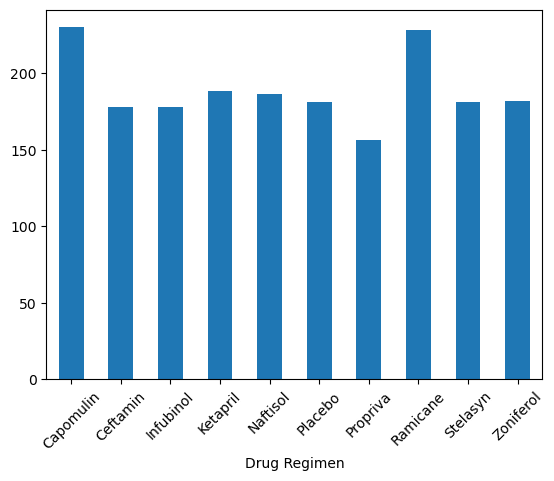

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_timepoints = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_pandas = mice_timepoints.plot.bar(x="Drug Regimen", y= "Mouse ID", rot= 45)
plt.title =("Total Number of Mice Per Treatment")
plt.xlabel =("Drug Regimen")
plt.ylabel =("Number of Mice Treated")


In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = np.arrange(len(mice_timepoints))
yaxis = mice_timepoints

plt.bar(xaxis, yaxis, width=0.6, align="center")

ticks = [value+0.5 for value in xaxis]

plt.xticks = (ticks, mice_timepoints.index.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Treated per Drug Regimen")
plt.show()


AttributeError: module 'numpy' has no attribute 'arrange'

<AxesSubplot:title={'center':'Sex Distribution among Mice treated'}>

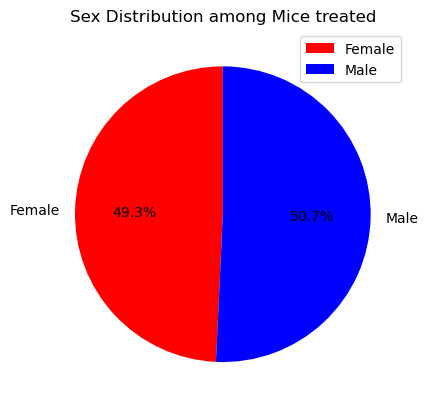

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_df.groupby(["Sex"]).count()
mice_gender
piepandas = micegender.plot.pie(y="Mouse ID", title=("Sex Distribution among Mice treated"), colors = ["red","blue"],startangle=90,autopct='%1.1f%%')
piepandas.set_ylabel("")
piepandas

TypeError: 'str' object is not callable

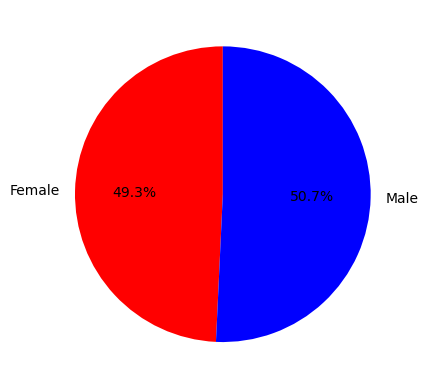

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender
labels = ["Female", "Male"]
colors = ["red", "blue"]
plt.pie(micegender["Mouse ID"], labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("Sex Distribution among Mice treated")
plt.legend(labels, loc="best")


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalvol = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
finalvol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalvol_merge = pd.merge(finalvol, clean_df, on=(["Mouse ID", "Timepoint"]))
finalvol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolume = finalvol_merge.loc[finalvol_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerquartile = quartiles[.25]
    upperquartile = quartiles[.75]
    iqr = lowerquartile - upperquartile
    
    lower_bound = lowerquartile - (1.5*iqr)
    upper_bound = upperquartile + (1.5*iqr)
    
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 44.05015203000001 and above 28.486425109999995 are outliers.
For Ramicane values below 45.20827463 and above 27.01120119 are outliers.
For Infubinol values below 71.26431043 and above 48.310040109999996 are outliers.
For Ceftamin values below 72.08870612 and above 40.93320176 are outliers.


([<matplotlib.axis.XTick at 0x7f86a2caeeb0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

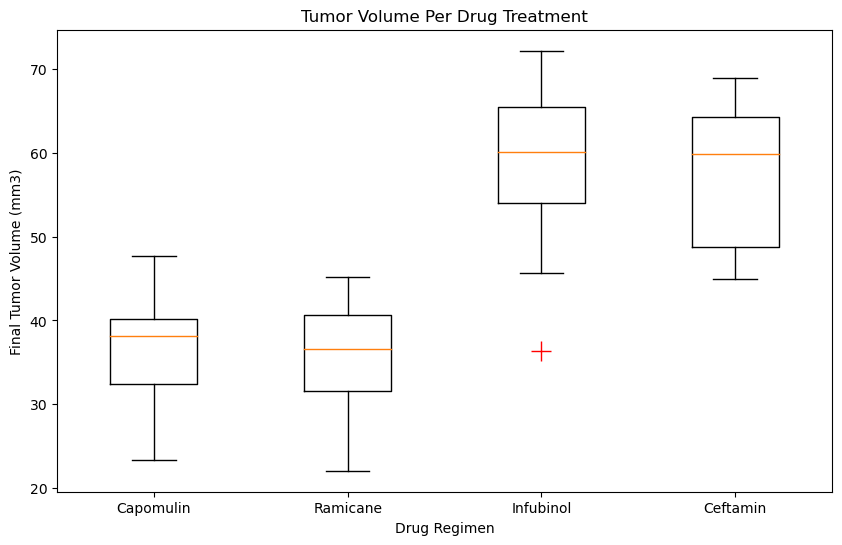

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots(figsize=(10,6))
#custom marker
flierprops = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='r')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
#set labels 
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
#label ticks
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

TypeError: 'str' object is not callable

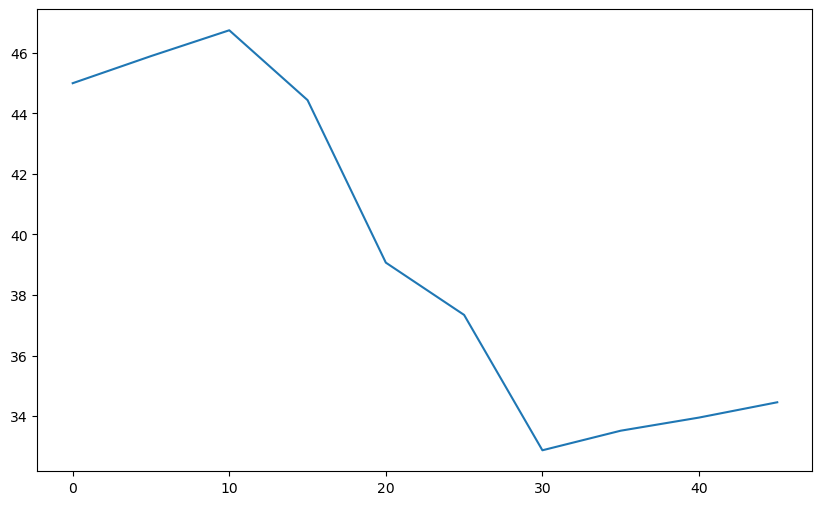

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_treatment = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_treatment.value_counts("Mouse ID")

t565 = clean_df.loc[clean_df["Mouse ID"] == "t565"]
t565

fig1,ax1 = plt.subplots(figsize=(10,6))

cap_xaxis = t565["Timepoint"]
cap_yaxis = t565["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse t565")
plt.show()

/var/folders/9w/fbjmnqjj6svfbzzc8vq7272r0000gn/T/ipykernel_25257/2304622277.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_weight = cap_treatment.groupby(["Mouse ID"]).mean()


TypeError: 'str' object is not callable

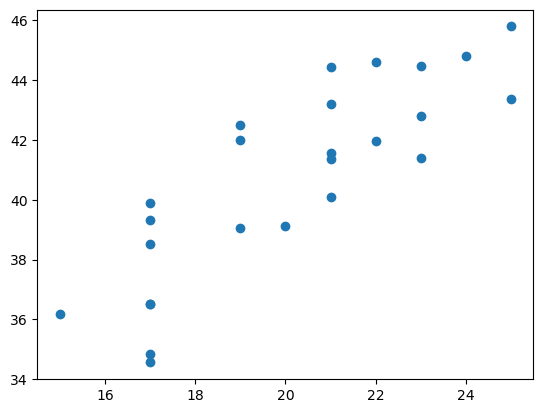

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap_weight = cap_treatment.groupby(["Mouse ID"]).mean()
plt.scatter(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694718


TypeError: 'str' object is not callable

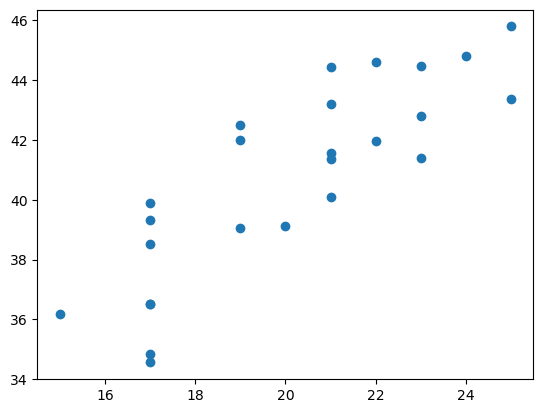

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corcoef = st.pearsonr(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {corcoef}")

#make scatter plot
plt.scatter(avg_cap_weight['Weight (g)'],avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

#variables for lin regression 
lin_x_values = avg_cap_weight['Weight (g)']
lin_y_values = avg_cap_weight['Tumor Volume (mm3)']

#develop equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x_values, lin_y_values)
regress_values = lin_x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

#add equation & line onto plot
plt.annotate(equation, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=12,color="red")
plt.plot(lin_x_values,regress_values,"r-")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()
